In [2]:
import rasterio

In [3]:
dataset = rasterio.open('dataverse_files/20190612T061021Z_MINERALOIL.tif')

In [4]:
dataset.crs

CRS.from_epsg(32631)

In [5]:
from matplotlib import pyplot as plt

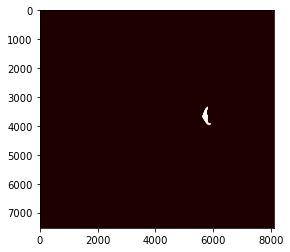

In [20]:
plt.imshow(dataset.read(1),cmap='pink')

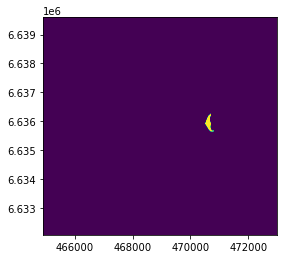

<AxesSubplot:>

In [7]:
from rasterio.plot import show
show(dataset)

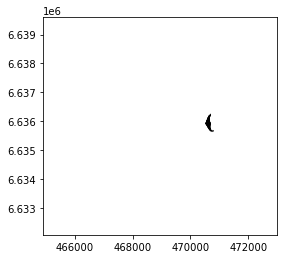

<AxesSubplot:>

In [21]:
show(dataset.read(), transform = dataset.transform, cmap='binary')

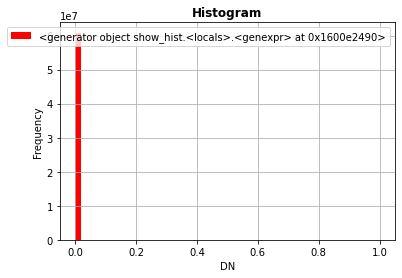

In [9]:
# Histogram of the raster data

from rasterio.plot import *

show_hist(dataset, bins=50, lw=0.0, stacked=False)

In [10]:
# Count of 1's, or pixels which represent that oil is at that location

sum(sum(dataset.read(1)))

32365

In [11]:
# Check the bounds of the raster data file, output in metres

dataset.bounds

BoundingBox(left=464894.8596313866, bottom=6632070.177489115, right=472988.8596313866, top=6639595.177489115)

In [12]:
from pyproj import Transformer
import cartopy.crs as ccrs

In [13]:
# examples = [(464894.8596313866, 6639595.177489115), (472988.8596313866, 6632070.177489115)]
# transformer = Transformer.from_crs(dataset.crs, ccrs.LambertCylindrical())
# coords = [transformer.transform(x, y) for x,y in examples]
# print(coords)

In [14]:
# Transform the boundaries (left, top) of the data points from metres from equator to latitude/longitude coordinates

from functools import partial
from pyproj import Proj, transform 
proj_32631 = Proj("epsg:32631")
proj_4326 = Proj("epsg:4326")
transformer = partial(transform, proj_32631, proj_4326)
transformer(464894.8596313866, 6639595.177489115)

/var/folders/2s/qbg4tq4d40l0jl4fm_cdjk040000gn/T/ipykernel_58700/1175517485.py:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  transformer(464894.8596313866, 6639595.177489115)


(59.89240713407246, 2.3726535557539683)

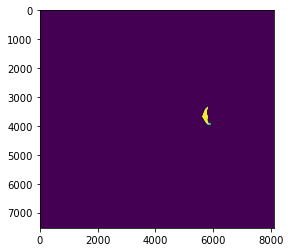

<AxesSubplot:>

In [17]:
show(dataset.read(), dataset.transform == transformer)

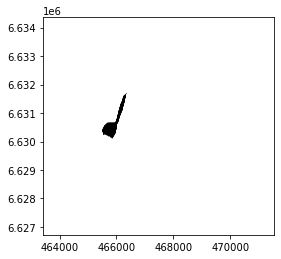

<AxesSubplot:>

In [23]:
dataset_final = rasterio.open('dataverse_files/20190612T121724Z_MINERALOIL.tif')
show(dataset_final.read(), transform = dataset_final.transform, cmap='binary')